In [11]:
import pandas as pd

In [12]:
dataset = pd.read_csv('ProcessedPlacement.csv')
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [13]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [16]:
dataset.cov(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-58.106028,-40.413645,52.556168,8.102336,2.449065e+04
ssc_p,-52.641355,117.228377,60.348373,42.897137,37.659225,24.535952,9.017549e+05
hsc_p,-58.106028,60.348373,118.755706,34.819820,35.461678,22.555846,7.633598e+05
degree_p,-40.413645,42.897137,34.819820,54.151103,21.929469,17.272020,4.651315e+05
etest_p,52.556168,37.659225,35.461678,21.929469,176.251018,16.886973,3.842344e+05
mba_p,8.102336,24.535952,22.555846,17.272020,16.886973,34.028376,1.262455e+05
salary,24490.654206,901754.893936,763359.777657,465131.504238,384234.419257,126245.485547,2.395714e+10


#### Information

etest_p	& mba_p : 16.886973 (Positive) <br>
hsc_p	& mba_p : 22.555846 (Positive) 


In [17]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


#### Information

etest_p	& mba_p : 0.218055 (Positive) <br>
hsc_p	& mba_p : 0.354823 (Positive) 

In [18]:
import seaborn as sns

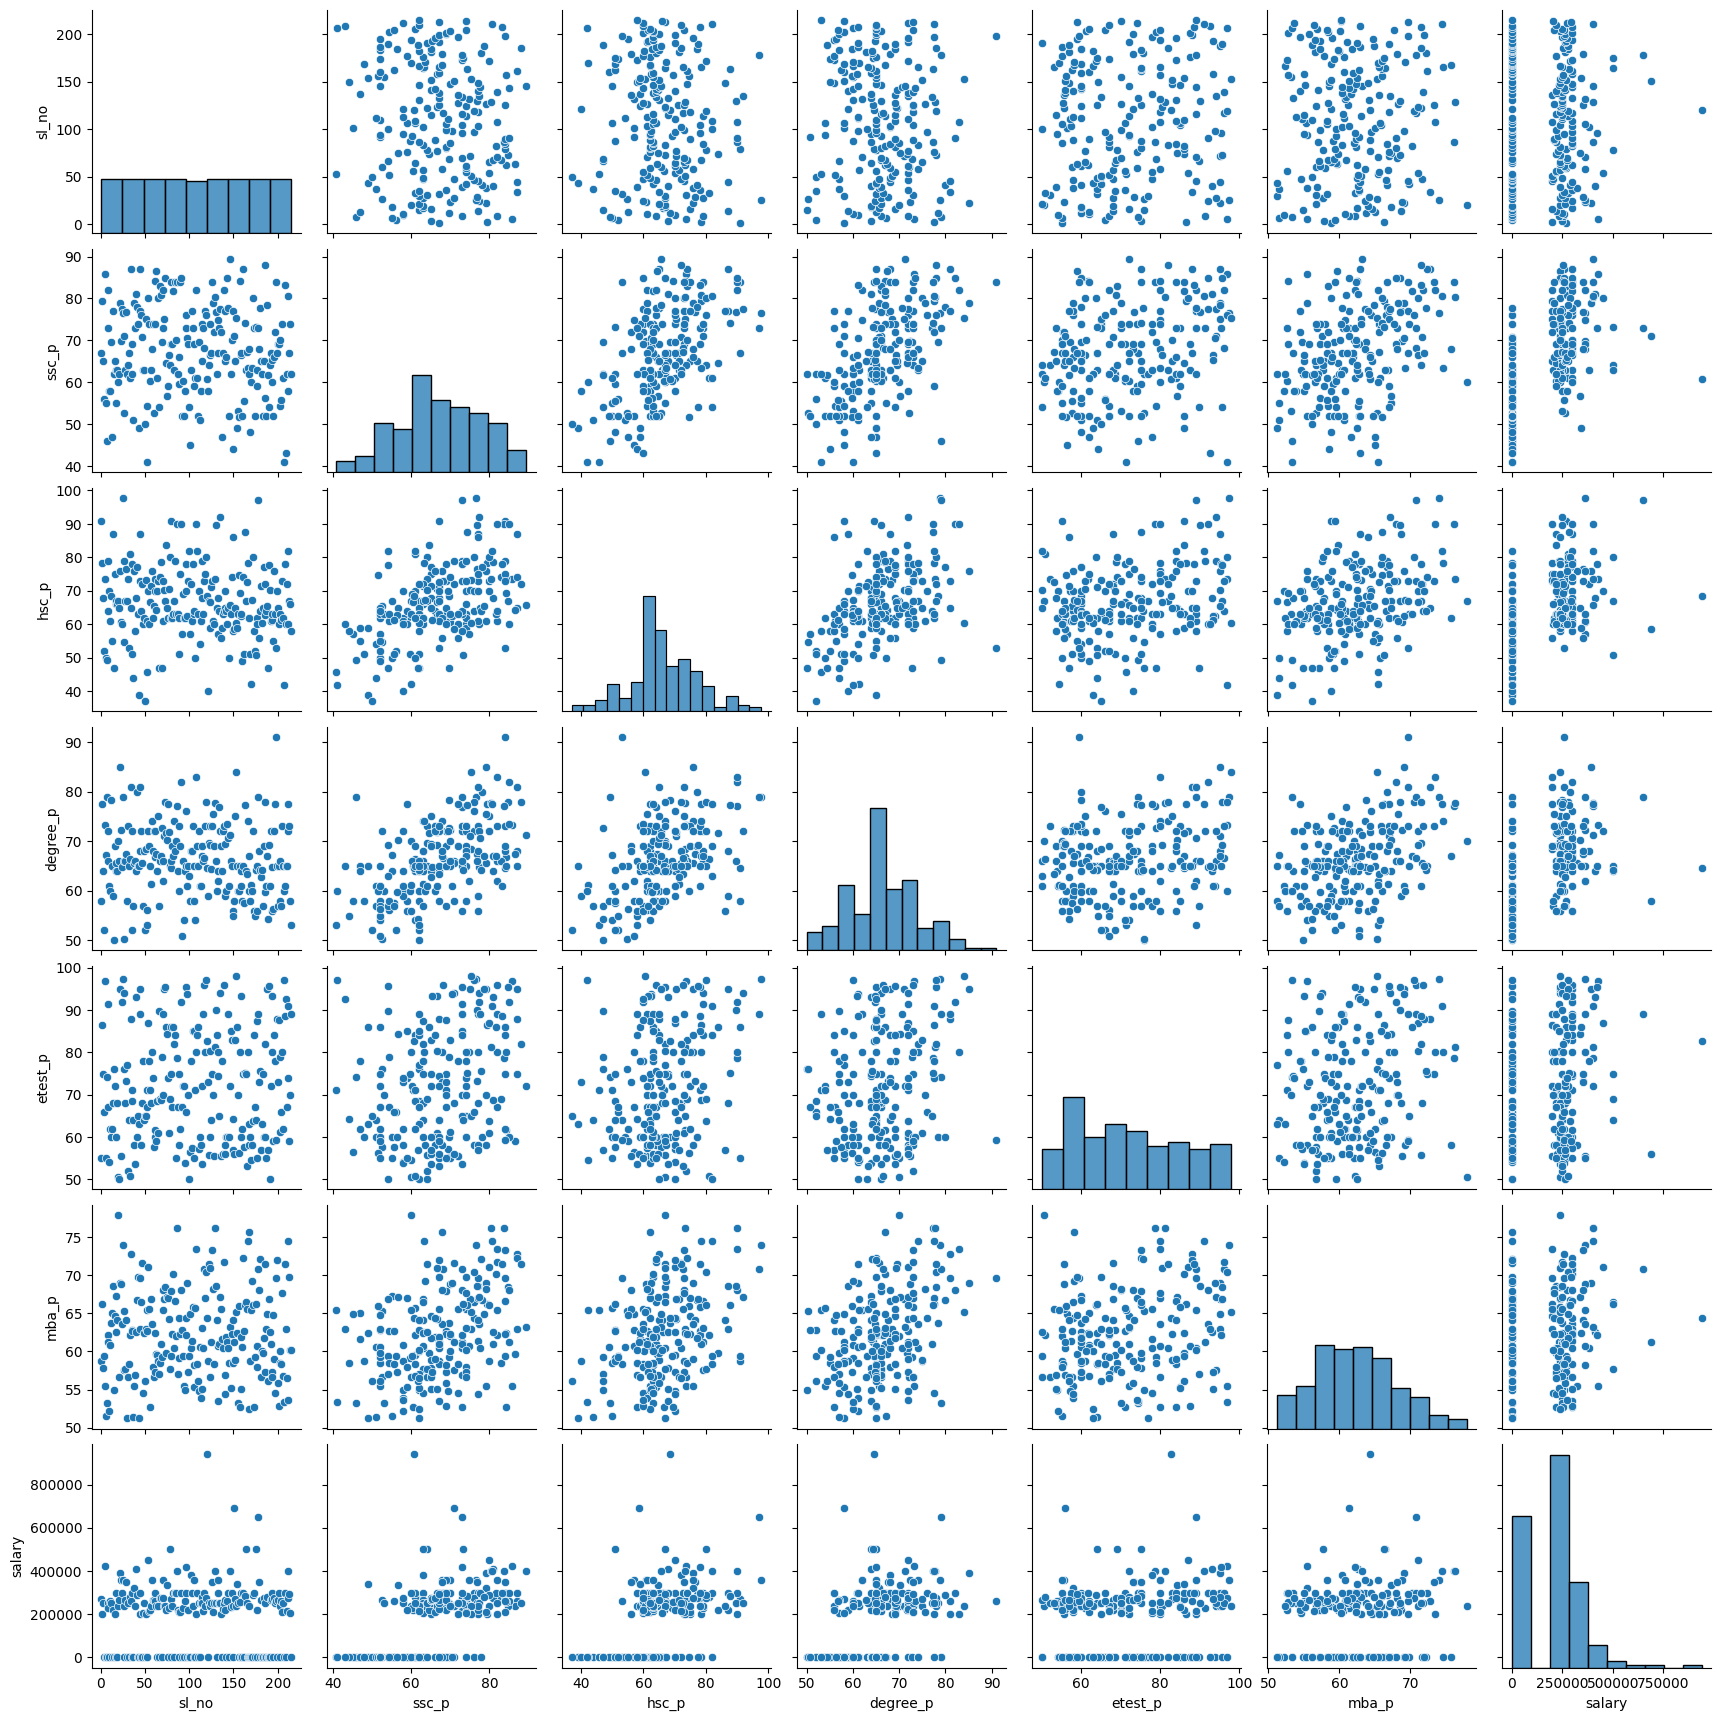

In [19]:
sns.pairplot(dataset)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vlf(X):
    vif = pd.DataFrame()
    vif['variables']=X.columns
    vif['VLF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [26]:
dataset.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [28]:
calc_vlf(dataset[['ssc_p','hsc_p']])

,variables,VLF
0,ssc_p,40.164883
1,hsc_p,40.164883


In [7]:
# import pingouin as pg
# print(pg.__version__)


0.5.5


In [8]:
# import pingouin as pg

# print([f for f in dir(pg) if "vif" in f])


[]


In [ ]:
# import pingouin as pg

# vif = pg.vif(dataset[['ssc_p','hsc_p']])
# print(vif)


In [4]:
!pip install --upgrade pingouin


Defaulting to user installation because normal site-packages is not writeable
